/home/amit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/amit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/amit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


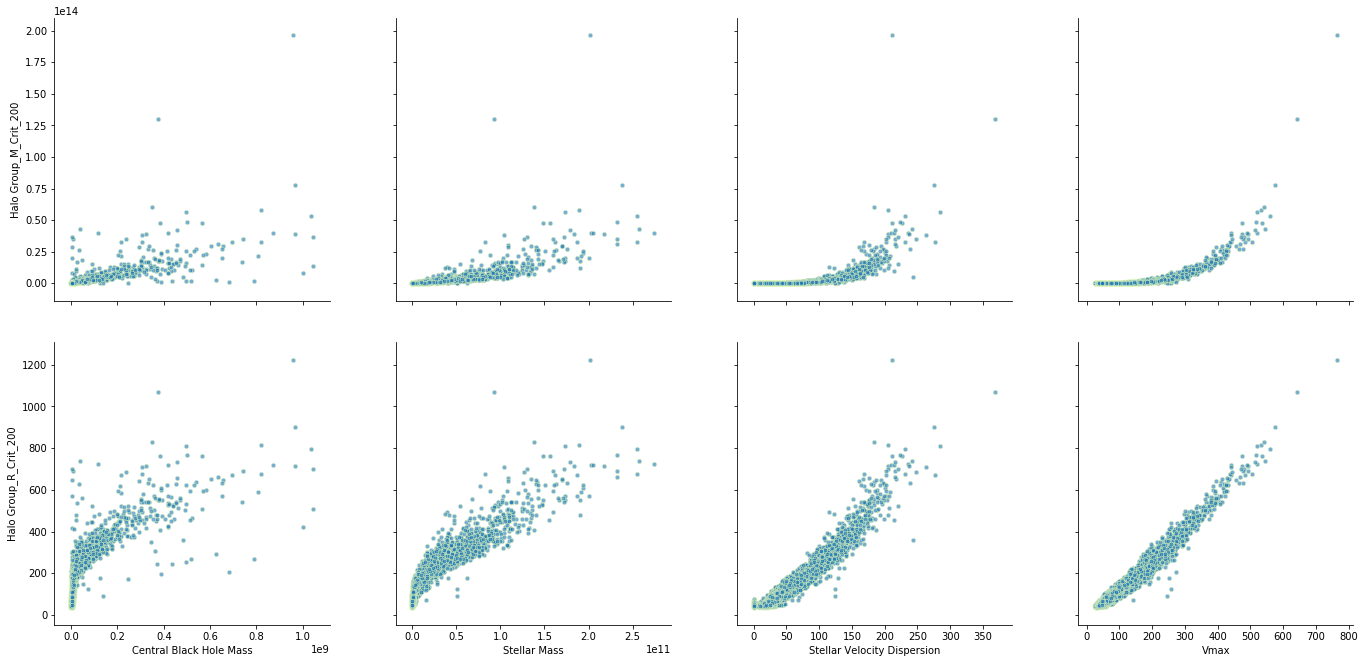

In [3]:
# this will generate the relation between baryonic properties and dark matter properties for central galaxies when we traverse along their 
# Top leaf

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('baryonProg.csv')
df = df.sample(frac=1).reset_index(drop=True)

# Black Hole mass with halo Virial Mass and radius
# Stellar Mass with halo Virial Mass and radius
# Vel Dispersion of Stars with halo virial mass and radius
baryonic_matter = df.iloc[:,0:4]
mean = baryonic_matter.mean(axis = 0)
st_deviation = baryonic_matter.std(axis = 0)
cutoffs = mean + 30*st_deviation
assert mean.shape == st_deviation.shape == cutoffs.shape

df = df[df.massCentralBlackHole < cutoffs[0]][df.stellarMass
        < cutoffs[1]][df.velDisp < cutoffs[2]][df.cgVmax
        < cutoffs[3]]

df['Stellar Mass'] = df['stellarMass']
df['Stellar Velocity Dispersion'] = df['velDisp']
df['Vmax'] = df['cgVmax']
df['Central Black Hole Mass'] = df['massCentralBlackHole']
df['Halo Group_M_Crit_200'] = df['haloVirialMass']
df['Halo Group_R_Crit_200'] = df['haloVirialRadius']


g = sns.pairplot(data=df,y_vars=['Halo Group_M_Crit_200','Halo Group_R_Crit_200' ], \
               x_vars=['Central Black Hole Mass','Stellar Mass','Stellar Velocity Dispersion','Vmax'], \
              kind="scatter", markers = '.', plot_kws=dict(alpha = 0.6, s= 80,
                edgecolor='#dff7be'))

g.fig.set_size_inches(20,10)
g.savefig("simulations.png")